In [1]:
import imp
try:
    imp.find_module("ecell")
except ImportError:
    import sys
    sys.path.append("/opt/local/lib/python2.7/site-packages")
    sys.path.append("/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages")

In [2]:
import biosim_course

In [3]:
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
EM = '''
@{
"""
(Process\s+)Expression(Flux|Assignment)(Process\()(\w+)(\)\s+\{[\w\W]*?)\n\s*Expression.+?;
$1Nygren_1998$4$2$3$4$5
"""

R  = 8314.0  # R in component membrane (millijoule_per_mole_kelvin)
T  = 306.15  # T in component membrane (kelvin)
F  = 96487   # F in component membrane (coulomb_per_mole)

stim_start     = 0.1        # stim_start in component membrane (second)
stim_end       = 100000000  # stim_end in component membrane (second)
stim_period    = 1          # stim_period in component membrane (second)
stim_duration  = 0.006      # stim_duration in component membrane (second)
stim_amplitude = -280       # stim_amplitude in component membrane (picoA)

Vol_i   = 0.005884          # Vol_i in component intracellular_ion_concentrations (nanolitre)
Vol_up  = 0.0003969         # Vol_up in component Ca_handling_by_the_SR (nanolitre)
Vol_rel = 4.41e-5           # Vol_rel in component Ca_handling_by_the_SR (nanolitre)
Vol_d   = 0.0200000 * Vol_i # Vol_d in component intracellular_ion_concentrations (nanolitre)
Vol_c   = 0.136000 * Vol_i  # Vol_c in component cleft_space_ion_concentrations (nanolitre)

k_rel_i = 0.0003   # k_rel_i in component Ca_handling_by_the_SR (millimolar)

}


Stepper FixedODE1Stepper( Default ){ StepInterval 1.0e-5; }

Stepper PassiveStepper( PSV ) {}

System System( / )
{
  StepperID    Default;

  Variable Variable( SIZE )
  {
      Value    1.0;
  }

  Variable Variable(voi)
  {
    Name "time in component environment (second)";
    Value  0.0;
  }

  Process Nygren_1998voiFluxProcess(voi)
  {
    Name "time in component environment (second)";

    VariableReferenceList
      [voi :.:voi  1];
  }

}

System System( /Cleft )
{
  StepperID    Default;

  Name "The the extracellular cleft space";

  Variable Variable(SIZE)
  {
    Name "Vol_c in component cleft_space_ion_concentrations (litre)";
    Value  @(Vol_c * 1.0e-9);
  }
  Variable Variable(Na_c)
  {
    Name "Na_c in component cleft_space_ion_concentrations (molar)";
    MolarConc  130.011e-3;
  }

  Variable Variable(K_c)
  {
    Name "K_c in component cleft_space_ion_concentrations (molar)";
    MolarConc  5.3581e-3;
  }

  Variable Variable(Ca_c)
  {
    Name "Ca_c in component cleft_space_ion_concentrations (molar)";
    MolarConc  1.8147e-3;
  }

  Process Nygren_1998j_Na_cFluxProcess(j_Na_c)
  {
    Name "d/dt Na_c in component cleft_space_ion_concentrations (millimolar)";

    tau_Na  14.3; # tau_Na in component cleft_space_ion_concentrations (second)
    Na_b  130; # Na_b in component cleft_space_ion_concentrations (millimolar)

    VariableReferenceList
      [Na_c :.:Na_c  1];
  }

  Process Nygren_1998j_K_cFluxProcess(j_K_c)
  {
    Name "d/dt K_c in component cleft_space_ion_concentrations (millimolar)";

    tau_K  10; # tau_K in component cleft_space_ion_concentrations (second)
    K_b  5.4; # K_b in component cleft_space_ion_concentrations (millimolar)

    VariableReferenceList
      [K_c   :.:K_c  1];
  }

  Process Nygren_1998j_Ca_cFluxProcess(j_Ca_c)
  {
    Name "d/dt Ca_c in component cleft_space_ion_concentrations (millimolar)";

    tau_Ca  24.7; # tau_Ca in component cleft_space_ion_concentrations (second)
    Ca_b  1.8; # Ca_b in component cleft_space_ion_concentrations (millimolar)

    VariableReferenceList
      [Ca_c :.:Ca_c  1];
  }

}

System System( /Cytosol )
{
  StepperID    Default;

  Name "Cytosol";

  Variable Variable( SIZE )
  {
    Name "Vol_i in component intracellular_ion_concentrations (litre)";
    Value    @(Vol_i * 1.0e-9);
  }

  ### status

  Variable Variable(V)
  {
    Name "V in component membrane (millivolt)";
    Value  -74.2525;
  }

  Variable Variable(Na_i)
  {
    Name "Na_i in component intracellular_ion_concentrations (molar)";
    MolarConc  8.5547e-3;
  }

  Variable Variable(m)
  {
    Name "m in component sodium_current_m_gate (dimensionless)";
    Value  0.0032017;
  }

  Variable Variable(h1)
  {
    Name "h1 in component sodium_current_h1_gate (dimensionless)";
    Value  0.8814;
  }

  Variable Variable(h2)
  {
    Name "h2 in component sodium_current_h2_gate (dimensionless)";
    Value  0.8742;
  }

  Variable Variable(d_L)
  {
    Name "d_L in component L_type_Ca_channel_d_L_gate (dimensionless)";
    Value  1.3005e-5;
  }

  Variable Variable(f_L_1)
  {
    Name "f_L_1 in component L_type_Ca_channel_f_L1_gate (dimensionless)";
    Value  0.9986;
  }

  Variable Variable(f_L_2)
  {
    Name "f_L_2 in component L_type_Ca_channel_f_L2_gate (dimensionless)";
    Value  0.9986;
  }

  Variable Variable(K_i)
  {
    Name "K_i in component intracellular_ion_concentrations (molar)";
    MolarConc  129.435e-3;
  }

  Variable Variable(r)
  {
    Name "r in component Ca_independent_transient_outward_K_current_r_gate (dimensionless)";
    Value  0.0010678;
  }

  Variable Variable(s)
  {
    Name "s in component Ca_independent_transient_outward_K_current_s_gate (dimensionless)";
    Value  0.949;
  }

  Variable Variable(r_sus)
  {
    Name "r_sus in component sustained_outward_K_current_r_sus_gate (dimensionless)";
    Value  0.00015949;
  }

  Variable Variable(s_sus)
  {
    Name "s_sus in component sustained_outward_K_current_s_sus_gate (dimensionless)";
    Value  0.9912;
  }

  Variable Variable(n)
  {
    Name "n in component delayed_rectifier_K_currents_n_gate (dimensionless)";
    Value  0.0048357;
  }

  Variable Variable(p_a)
  {
    Name "p_a in component delayed_rectifier_K_currents_pa_gate (dimensionless)";
    Value  0.0001;
  }

  Variable Variable(Ca_i)
  {
    Name "Ca_i in component intracellular_ion_concentrations (molar)";
    MolarConc  6.729e-8;
  }

  Variable Variable(O_C)
  {
    Name "O_C in component intracellular_Ca_buffering (dimensionless)";
    Value  0.0275;
  }

  Variable Variable(O_TC)
  {
    Name "O_TC in component intracellular_Ca_buffering (dimensionless)";
    Value  0.0133;
  }

  Variable Variable(O_TMgC)
  {
    Name "O_TMgC in component intracellular_Ca_buffering (dimensionless)";
    Value  0.1961;
  }

  Variable Variable(O_TMgMg)
  {
    Name "O_TMgMg in component intracellular_Ca_buffering (dimensionless)";
    Value  0.7094;
  }

  ### algebraic

  Variable Variable(i_Stim)
  {
    Name "i_Stim in component membrane (picoA)";
    Value  0.0;
  }

  Variable Variable(m_infinity)
  {
    Name "m_infinity in component sodium_current_m_gate (dimensionless)";
    Value  0.0032017055046363744;
  }

  Variable Variable(h_infinity)
  {
    Name "h_infinity in component sodium_current_h1_gate (dimensionless)";
    Value  0.8818331920341357;
  }

  Variable Variable(d_L_infinity)
  {
    Name "d_L_infinity in component L_type_Ca_channel_d_L_gate (dimensionless)";
    Value  1.3001523226591241e-05;
  }

  Variable Variable(f_L_infinity)
  {
    Name "f_L_infinity in component L_type_Ca_channel_f_L1_gate (dimensionless)";
    Value  0.9986400461877076;
  }

  Variable Variable(r_infinity)
  {
    Name "r_infinity in component Ca_independent_transient_outward_K_current_r_gate (dimensionless)";
    Value  0.0010677467619427574;
  }

  Variable Variable(s_infinity)
  {
    Name "s_infinity in component Ca_independent_transient_outward_K_current_s_gate (dimensionless)";
    Value  0.949549739332083;
  }

  Variable Variable(r_sus_infinity)
  {
    Name "r_sus_infinity in component sustained_outward_K_current_r_sus_gate (dimensionless)";
    Value  0.00015937958206002146;
  }

  Variable Variable(s_sus_infinity)
  {
    Name "s_sus_infinity in component sustained_outward_K_current_s_sus_gate (dimensionless)";
    Value  0.998246137934045;
  }

  Variable Variable(n_infinity)
  {
    Name "n_infinity in component delayed_rectifier_K_currents_n_gate (dimensionless)";
    Value  0.0006026430448910566;
  }

  Variable Variable(p_a_infinity)
  {
    Name "p_a_infinity in component delayed_rectifier_K_currents_pa_gate (dimensionless)";
    Value  5.142078505326955e-05;
  }

  Variable Variable(E_Na)
  {
    Name "E_Na in component sodium_current (millivolt)";
    Value  71.78374025254665;
  }

  Variable Variable(tau_m)
  {
    Name "tau_m in component sodium_current_m_gate (second)";
    Value  2.6411712783673727e-05;
  }

  Variable Variable(tau_h1)
  {
    Name "tau_h1 in component sodium_current_h1_gate (second)";
    Value  0.03029985430041965;
  }

  Variable Variable(tau_h2)
  {
    Name "tau_h2 in component sodium_current_h2_gate (second)";
    Value  0.12299941720167859;
  }

  Variable Variable(tau_d_L)
  {
    Name "tau_d_L in component L_type_Ca_channel_d_L_gate (second)";
    Value  0.0024873842753601674;
  }

  Variable Variable(tau_f_L1)
  {
    Name "tau_f_L1 in component L_type_Ca_channel_f_L1_gate (second)";
    Value  0.010561832433011065;
  }

  Variable Variable(tau_f_L2)
  {
    Name "tau_f_L2 in component L_type_Ca_channel_f_L2_gate (second)";
    Value  0.06655984396077287;
  }

  Variable Variable(tau_r)
  {
    Name "tau_r in component Ca_independent_transient_outward_K_current_r_gate (second)";
    Value  0.0015076482796525805;
  }

  Variable Variable(tau_s)
  {
    Name "tau_s in component Ca_independent_transient_outward_K_current_s_gate (second)";
    Value  0.07183350864577431;
  }

  Variable Variable(tau_r_sus)
  {
    Name "tau_r_sus in component sustained_outward_K_current_r_sus_gate (second)";
    Value  0.009472038556972982;
  }

  Variable Variable(tau_s_sus)
  {
    Name "tau_s_sus in component sustained_outward_K_current_s_sus_gate (second)";
    Value  0.33788952618800877;
  }

  Variable Variable(tau_n)
  {
    Name "tau_n in component delayed_rectifier_K_currents_n_gate (second)";
    Value  0.7000000000905494;
  }

  Variable Variable(tau_p_a)
  {
    Name "tau_p_a in component delayed_rectifier_K_currents_pa_gate (second)";
    Value  0.031750398000436095;
  }

  Variable Variable(i_Na)
  {
    Name "i_Na in component sodium_current (picoA)";
    Value  0.0;
  }

  Variable Variable(f_Ca)
  {
    Name "f_Ca in component L_type_Ca_channel (dimensionless)";
    Value  0.002891415473410205;
  }

  Variable Variable(i_Ca_L)
  {
    Name "i_Ca_L in component L_type_Ca_channel (picoA)";
    Value  0.0;
  }

  Variable Variable(E_K)
  {
    Name "E_K in component Ca_independent_transient_outward_K_current (millivolt)";
    Value  -84.00907384905881;
  }

  Variable Variable(i_t)
  {
    Name "i_t in component Ca_independent_transient_outward_K_current (picoA)";
    Value  0.0;
  }

  Variable Variable(i_sus)
  {
    Name "i_sus in component sustained_outward_K_current (picoA)";
    Value  0.0;
  }

  Variable Variable(p_i)
  {
    Name "p_i in component delayed_rectifier_K_currents_pi_gate (dimensionless)";
    Value  0.6904422140268597;
  }

  Variable Variable(i_K1)
  {
    Name "i_K1 in component inward_rectifier (picoA)";
    Value  0.0;
  }

  Variable Variable(i_Kr)
  {
    Name "i_Kr in component delayed_rectifier_K_currents (picoA)";
    Value  0.0;
  }

  Variable Variable(i_Ks)
  {
    Name "i_Ks in component delayed_rectifier_K_currents (picoA)";
    Value  0.0;
  }

  Variable Variable(i_B_Na)
  {
    Name "i_B_Na in component background_currents (picoA)";
    Value  0.0;
  }

  Variable Variable(E_Ca)
  {
    Name "E_Ca in component background_currents (millivolt)";
    Value  134.5701213309398;
  }

  Variable Variable(i_B_Ca)
  {
    Name "i_B_Ca in component background_currents (picoA)";
    Value  0.0;
  }

  Variable Variable(i_NaK)
  {
    Name "i_NaK in component sodium_potassium_pump (picoA)";
    Value  0.0;
  }

  Variable Variable(i_CaP)
  {
    Name "i_CaP in component sarcolemmal_calcium_pump_current (picoA)";
    Value  0.0;
  }

  Variable Variable(i_NaCa)
  {
    Name "i_NaCa in component Na_Ca_ion_exchanger_current (picoA)";
    Value  0.0;
  }

  Variable Variable(dOCdt)
  {
    Name "dOCdt in component intracellular_Ca_buffering (per_second)";
    Value  0.0;
  }

  Variable Variable(dOTCdt)
  {
    Name "dOTCdt in component intracellular_Ca_buffering (per_second)";
    Value  0.0;
  }

  Variable Variable(dOTMgCdt)
  {
    Name "dOTMgCdt in component intracellular_Ca_buffering (per_second)";
    Value  0.0;
  }

  Process Nygren_1998_VFluxProcess(v_V)
  {
    Name "d/dt V in component membrane (millivolt)";

    Cm  0.05; # Cm in component membrane (nanoF)

    VariableReferenceList
      [V      :.:V       1]
      [i_Stim :.:i_Stim  0]
      [i_Na   :.:i_Na    0]
      [i_Ca_L :.:i_Ca_L  0]
      [i_t    :.:i_t     0]
      [i_sus  :.:i_sus   0]
      [i_K1   :.:i_K1    0]
      [i_Kr   :.:i_Kr    0]
      [i_Ks   :.:i_Ks    0]
      [i_B_Na :.:i_B_Na  0]
      [i_B_Ca :.:i_B_Ca  0]
      [i_NaK  :.:i_NaK   0]
      [i_CaP  :.:i_CaP   0]
      [i_NaCa :.:i_NaCa  0];
  }

  Process Nygren_1998j_K_iFluxProcess(j_K_i)
  {
    Name "d/dt K_i in component intracellular_ion_concentrations (millimolar)";

    F  @F;

    VariableReferenceList
      [K_c   :../Cleft:K_c  1]
      [K_i   :.:K_i        -1]
      [i_t   :.:i_t         0]
      [i_sus :.:i_sus       0]
      [i_K1  :.:i_K1        0]
      [i_Kr  :.:i_Kr        0]
      [i_Ks  :.:i_Ks        0]
      [i_NaK :.:i_NaK       0];
  }

  Process Nygren_1998j_Na_iFluxProcess(j_Na_i)
  {
    Name "d/dt Na_i in component intracellular_ion_concentrations (millimolar)";

    F  @F;
    phi_Na_en -1.68;  # phi_Na_en in component intracellular_ion_concentrations (picoA)

    VariableReferenceList
      [Na_c   :../Cleft:Na_c  1]
      [Na_i   :.:Na_i        -1]
      [i_Na   :.:i_Na         0]
      [i_B_Na :.:i_B_Na       0]
      [i_NaK  :.:i_NaK        0]
      [i_NaCa :.:i_NaCa       0];
  }

  Process Nygren_1998j_Ca_iFluxProcess(j_Ca_i)
  {
    Name "d/dt Ca_i in component intracellular_ion_concentrations (millimolar)";

    F  @F;

    VariableReferenceList
      [Ca_i     :.:Ca_i      1]
      [dOTCdt   :.:dOTCdt    0]
      [dOTMgCdt :.:dOTMgCdt  0]
      [dOCdt    :.:dOCdt     0];
  }

    Process Nygren_1998j_Ca_i_cFluxProcess(j_Ca_i_c)
    {
      Name "d/dt Ca_i in component intracellular_ion_concentrations (millimolar)";

      F  @F;

      VariableReferenceList
        [Ca_c   :../Cleft:Ca_c  1]
        [Ca_i   :.:Ca_i        -1]
        [i_B_Ca :.:i_B_Ca       0]
        [i_CaP  :.:i_CaP        0]
        [i_NaCa :.:i_NaCa       0];
    }

  Process Nygren_1998_EAssignmentProcess(E_K)
  {
    StepperID    PSV;
    F  @F;
    T  @T;
    R  @R;
    z  1;

    VariableReferenceList
      [E :.:E_K         1]
      [o :../Cleft:K_c  0]
      [i :.:K_i         0];
  }

  Process Nygren_1998_ItAssignmentProcess(i_t)
  {
    StepperID    PSV;

    g_t  7.5; # g_t in component Ca_independent_transient_outward_K_current (nanoS)

    VariableReferenceList
      [i_t        :.:i_t         1]
      [tau_r      :.:tau_r       1]
      [r_infinity :.:r_infinity  1]
      [tau_s      :.:tau_s       1]
      [s_infinity :.:s_infinity  1]
      [r          :.:r           0]
      [s          :.:s           0]
      [V          :.:V           0]
      [E_K        :.:E_K         0];
  }

  Process Nygren_1998_GatingFluxProcess(v_r)
  {
    Name "d/dt r in component Ca_independent_transient_outward_K_current_r_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:r           1]
      [g_inf :.:r_infinity  0]
      [g_tau :.:tau_r       0];
  }

  Process Nygren_1998_GatingFluxProcess(v_s)
  {
    Name "d/dt s in component Ca_independent_transient_outward_K_current_s_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:s           1]
      [g_inf :.:s_infinity  0]
      [g_tau :.:tau_s       0];
  }

  Process Nygren_1998_IsusAssignmentProcess(i_sus)
  {
    StepperID    PSV;

    g_sus  2.75; # g_sus in component sustained_outward_K_current (nanoS)

    VariableReferenceList
      [tau_r_sus      :.:tau_r_sus       1]
      [r_sus_infinity :.:r_sus_infinity  1]
      [tau_s_sus      :.:tau_s_sus       1]
      [s_sus_infinity :.:s_sus_infinity  1]
      [i_sus          :.:i_sus           1]
      [r_sus          :.:r_sus           0]
      [s_sus          :.:s_sus           0]
      [V              :.:V               0]
      [E_K            :.:E_K             0];
  }

  Process Nygren_1998_GatingFluxProcess(v_r_sus)
  {
    Name "d/dt r_sus in component sustained_outward_K_current_r_sus_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:r_sus           1]
      [g_inf :.:r_sus_infinity  0]
      [g_tau :.:tau_r_sus       0];
  }

  Process Nygren_1998_GatingFluxProcess(v_s_sus)
  {
    Name "d/dt s_sus in component sustained_outward_K_current_s_sus_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:s_sus           1]
      [g_inf :.:s_sus_infinity  0]
      [g_tau :.:tau_s_sus       0];
  }

  Process Nygren_1998_IKrAssignmentProcess(i_Kr)
  {
    StepperID    PSV;

    g_Kr  0.5; # g_Kr in component delayed_rectifier_K_currents (nanoS)

    VariableReferenceList
      [tau_p_a      :.:tau_p_a       1]
      [p_a_infinity :.:p_a_infinity  1]
      [p_i :.:p_i  1]
      [i_Kr :.:i_Kr  1]
      [p_a  :.:p_a   0]
      [V    :.:V     0]
      [E_K  :.:E_K   0];
  }

  Process Nygren_1998_GatingFluxProcess(v_p_a)
  {
    Name "d/dt p_a in component delayed_rectifier_K_currents_pa_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:p_a           1]
      [g_inf :.:p_a_infinity  0]
      [g_tau :.:tau_p_a       0];
  }

  Process Nygren_1998_IKsAssignmentProcess(i_Ks)
  {
    StepperID    PSV;

    g_Ks  1; # g_Ks in component delayed_rectifier_K_currents (nanoS)

    VariableReferenceList
      [tau_n        :.:tau_n         1]
      [n_infinity   :.:n_infinity    1]
      [i_Ks :.:i_Ks  1]
      [n    :.:n     0]
      [V    :.:V     0]
      [E_K  :.:E_K   0];
  }

  Process Nygren_1998_GatingFluxProcess(v_n)
  {
    Name "d/dt n in component delayed_rectifier_K_currents_n_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:n           1]
      [g_inf :.:n_infinity  0]
      [g_tau :.:tau_n       0];
  }

  Process Nygren_1998i_K1AssignmentProcess(i_K1)
  {
    StepperID    PSV;

    T  @T;
    R  @R;
    F  @F;
    g_K1  3; # g_K1 in component inward_rectifier (nanoS)

    VariableReferenceList
      [i_K1 :.:i_K1        1]
      [K_c  :../Cleft:K_c  0]
      [V    :.:V           0]
      [E_K  :.:E_K         0];
  }

  Process Nygren_1998i_NaKAssignmentProcess(i_NaK)
  {
    StepperID    PSV;

    k_NaK_Na  11; # k_NaK_Na in component sodium_potassium_pump (millimolar)
    k_NaK_K  1; # k_NaK_K in component sodium_potassium_pump (millimolar)
    i_NaK_max  70.8253; # i_NaK_max in component sodium_potassium_pump (picoA)

    VariableReferenceList
      [i_NaK :.:i_NaK       1]
      [K_c   :../Cleft:K_c  0]
      [Na_i  :.:Na_i        0]
      [V     :.:V           0];
  }

  Process Nygren_1998_EAssignmentProcess(E_Na)
  {
    StepperID    PSV;

    F  @F;
    T  @T;
    R  @R;
    z  1;

    VariableReferenceList
      [E :.:E_Na         1]
      [o :../Cleft:Na_c  0]
      [i :.:Na_i         0];
  }

  Process Nygren_1998_INaAssignmentProcess(i_Na)
  {
    StepperID    PSV;

    T  @T;
    R  @R;
    F  @F;
    P_Na  0.0016; # P_Na in component sodium_current (nanolitre_per_second)

    VariableReferenceList
      [i_Na :.:i_Na         1]
      [m_infinity :.:m_infinity  1]
      [tau_m      :.:tau_m       1]
      [h_infinity :.:h_infinity  1]
      [tau_h1     :.:tau_h1      1]
      [tau_h2     :.:tau_h2      1]
      [m    :.:m            0]
      [h1   :.:h1           0]
      [h2   :.:h2           0]
      [Na_c :../Cleft:Na_c  0]
      [V    :.:V            0]
      [E_Na :.:E_Na         0];
  }

  Process Nygren_1998_GatingFluxProcess(v_m)
  {

    VariableReferenceList
      [gate  :.:m           1]
      [g_inf :.:m_infinity  0]
      [g_tau :.:tau_m       0];
  }

  Process Nygren_1998_GatingFluxProcess(v_h1)
  {
    Name "d/dt h1 in component sodium_current_h1_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:h1          1]
      [g_inf :.:h_infinity  0]
      [g_tau :.:tau_h1      0];
  }

  Process Nygren_1998_GatingFluxProcess(v_h2)
  {
    Name "d/dt h2 in component sodium_current_h2_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:h2          1]
      [g_inf :.:h_infinity  0]
      [g_tau :.:tau_h2      0];
  }

  Process Nygren_1998_BackgroudLeakAssignmentProcess(i_B_Na)
  {
    StepperID    PSV;

    g  0.060599; # g_B_Na in component background_currents (nanoS)

    VariableReferenceList
      [i :.:i_B_Na  1]
      [V :.:V       0]
      [E :.:E_Na    0];
  }

  Process Nygren_1998_EAssignmentProcess(E_Ca)
  {
    StepperID    PSV;

    F  @F;
    T  @T;
    R  @R;
    z  2;

    VariableReferenceList
      [E :.:E_Ca         1]
      [o :../Cleft:Ca_c  0]
      [i :.:Ca_i         0];
  }

  Process Nygren_1998_ICaLAssignmentProcess(i_Ca_L)
  {
    StepperID    PSV;

    E_Ca_app  60; # E_Ca_app in component L_type_Ca_channel (millivolt)
    g_Ca_L  6.75; # g_Ca_L in component L_type_Ca_channel (nanoS)
    k_Ca  0.025; # k_Ca in component L_type_Ca_channel (millimolar)

    VariableReferenceList
      [i_Ca_L :.:i_Ca_L  1]
      [d_L_infinity :.:d_L_infinity  1]
      [tau_d_L      :.:tau_d_L       1]
      [f_L_infinity :.:f_L_infinity  1]
      [tau_f_L1     :.:tau_f_L1      1]
      [tau_f_L2     :.:tau_f_L2      1]
      [f_Ca :.:f_Ca     1]
      [d_L    :.:d_L     0]
      [f_L_1  :.:f_L_1   0]
      [f_L_2  :.:f_L_2   0]
      [Ca_d :../d:Ca_d  0]
      [V      :.:V       0];
  }

  Process Nygren_1998_GatingFluxProcess(v_d_L)
  {
    Name "d/dt d_L in component L_type_Ca_channel_d_L_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:d_L           1]
      [g_inf :.:d_L_infinity  0]
      [g_tau :.:tau_d_L       0];
  }

  Process Nygren_1998_GatingFluxProcess(v_f_L_1)
  {
    Name "d/dt f_L_1 in component L_type_Ca_channel_f_L1_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:f_L_1         1]
      [g_inf :.:f_L_infinity  0]
      [g_tau :.:tau_f_L1      0];
  }

  Process Nygren_1998_GatingFluxProcess(v_f_L_2)
  {
    Name "d/dt f_L_2 in component L_type_Ca_channel_f_L2_gate (dimensionless)";

    VariableReferenceList
      [gate  :.:f_L_2         1]
      [g_inf :.:f_L_infinity  0]
      [g_tau :.:tau_f_L2      0];
  }

  Process Nygren_1998_BackgroudLeakAssignmentProcess(i_B_Ca)
  {
    StepperID    PSV;

    g  0.078681; # g_B_Ca in component background_currents (nanoS)

    VariableReferenceList
      [i :.:i_B_Ca  1]
      [V :.:V       0]
      [E :.:E_Ca    0];
  }

  Process Nygren_1998i_CaPAssignmentProcess(i_CaP)
  {
    StepperID    PSV;

    k_CaP  0.0002; # k_CaP in component sarcolemmal_calcium_pump_current (millimolar)
    i_CaP_max  4; # i_CaP_max in component sarcolemmal_calcium_pump_current (picoA)

    VariableReferenceList
      [i_CaP :.:i_CaP  1]
      [Ca_i  :.:Ca_i   0];
  }

  Process Nygren_1998i_NaCaAssignmentProcess(i_NaCa)
  {
    StepperID    PSV;

    T  @T;
    R  @R;
    F  @F;
    gamma  0.45; # gamma in component Na_Ca_ion_exchanger_current (dimensionless)
    k_NaCa  0.0374842; # k_NaCa in component Na_Ca_ion_exchanger_current (picoA_per_millimolar_4)
    d_NaCa  0.0003; # d_NaCa in component Na_Ca_ion_exchanger_current (per_millimolar_4)

    VariableReferenceList
      [i_NaCa :.:i_NaCa       1]
      [Na_i   :.:Na_i         0]
      [Ca_c   :../Cleft:Ca_c  0]
      [V      :.:V            0]
      [Na_c   :../Cleft:Na_c  0]
      [Ca_i   :.:Ca_i         0];
  }

  Process Nygren_1998i_StimAssignmentProcess(i_Stim)
  {
    StepperID    PSV;

    Name "i_Stim in component membrane (picoA)";

    stim_amplitude  @stim_amplitude;
    stim_duration  @stim_duration;
    stim_period  @stim_period;
    stim_start  @stim_start;
    stim_end  @stim_end;

    VariableReferenceList
      [i_Stim :.:i_Stim  1]
      [voi    :/:voi     0];
  }

  Process Nygren_1998_OAssignmentProcess(O)
  {
    StepperID    PSV;

    VariableReferenceList
      [dOCdt    :.:dOCdt     1]
      [dOTCdt   :.:dOTCdt    1]
      [dOTMgCdt :.:dOTMgCdt  1]
      [O_C      :.:O_C       0]
      [O_TC     :.:O_TC      0]
      [O_TMgC   :.:O_TMgC    0]
      [O_TMgMg  :.:O_TMgMg   0]
      [Ca_i     :.:Ca_i      0];
  }

  Process Nygren_1998v_O_CFluxProcess(v_O_C)
  {
    Name "d/dt O_C in component intracellular_Ca_buffering (dimensionless)";

    VariableReferenceList
      [O_C   :.:O_C    1]
      [dOCdt :.:dOCdt  0];
  }

  Process Nygren_1998v_O_TCFluxProcess(v_O_TC)
  {
    Name "d/dt O_TC in component intracellular_Ca_buffering (dimensionless)";

    VariableReferenceList
      [O_TC   :.:O_TC    1]
      [dOTCdt :.:dOTCdt  0];
  }

  Process Nygren_1998v_O_TMgCFluxProcess(v_O_TMgC)
  {
    Name "d/dt O_TMgC in component intracellular_Ca_buffering (dimensionless)";

    VariableReferenceList
      [O_TMgC   :.:O_TMgC    1]
      [dOTMgCdt :.:dOTMgCdt  0];
  }

  Process Nygren_1998v_O_TMgMgFluxProcess(v_O_TMgMg)
  {

    Mg_i  2.5; # Mg_i in component intracellular_Ca_buffering (millimolar)

    VariableReferenceList
      [O_TMgMg :.:O_TMgMg 1]
      [O_TMgC  :.:O_TMgC  0];
  }

}

System System( /d )
{
  StepperID    Default;

  Name "The diffusion-restricted subsarcolemmal space";

  Variable Variable(SIZE)
  {
    Name "Vol_d in component intracellular_ion_concentrations (litre)";
    Value  @(Vol_d * 1.0e-9);
  }

  Variable Variable(Ca_d)
  {
    Name "Ca_d in component intracellular_ion_concentrations (molar)";
    MolarConc  7.2495e-8;
  }

  Variable Variable(i_di)
  {
    Name "i_di in component intracellular_ion_concentrations (picoA)";
    Value  0.0;
  }

  Process Nygren_1998i_diAssignmentProcess(i_di)
  {
    StepperID    PSV;

    tau_di  0.01; # tau_di in component intracellular_ion_concentrations (second)
    F  @F;

    VariableReferenceList
      [i_di :.:i_di           1]
      [Ca_d :.:Ca_d           0]
      [Ca_i :../Cytosol:Ca_i  0];
  }

  Process Nygren_1998j_Ca_diFluxProcess(j_Ca_di)
  {
    Name "d/dt Ca_d in component intracellular_ion_concentrations (millimolar)";

    F  @F;

    VariableReferenceList
      [Ca_i :../Cytosol:Ca_i  1]
      [Ca_d :.:Ca_d          -1]
      [i_di :.:i_di           0];
  }

  Process Nygren_1998j_Ca_dFluxProcess(j_Ca_d)
  {
    Name "d/dt Ca_d in component intracellular_ion_concentrations (millimolar)";

    F  @F;

    VariableReferenceList
      [Ca_d   :.:Ca_d             1]
      [Ca_c   :../Cleft:Ca_c     -1]
      [i_Ca_L :../Cytosol:i_Ca_L  0];
  }

}

System System( /SR_up )
{
  StepperID    Default;

  Name "The sarcoplasmic reticulum uptake compartment";

  Variable Variable(SIZE)
  {
    Name "Vol_up in component Ca_handling_by_the_SR (litre)";
    Value  @(Vol_up * 1.0e-9);
  }

  Variable Variable(i_up)
  {
    Name "i_up in component Ca_handling_by_the_SR (picoA)";
    Value  0.0;
  }

  Variable Variable(Ca_up)
  {
    Name "Ca_up in component Ca_handling_by_the_SR (molar)";
    MolarConc  0.6646e-3;
  }

  Process Nygren_1998i_upAssignmentProcess(i_up)
  {
    StepperID    PSV;

    k_srca  0.5; # k_srca in component Ca_handling_by_the_SR (millimolar)
    k_xcs  0.4; # k_xcs in component Ca_handling_by_the_SR (dimensionless)
    k_cyca  0.0003; # k_cyca in component Ca_handling_by_the_SR (millimolar)
    I_up_max  2800; # I_up_max in component Ca_handling_by_the_SR (picoA)

    VariableReferenceList
      [i_up  :.:i_up           1]
      [Ca_i  :../Cytosol:Ca_i  0]
      [Ca_up :.:Ca_up          0];
  }

  Process Nygren_1998j_Ca_up_iFluxProcess(j_Ca_up_i)
  {
    Name "d/dt Ca_up in component Ca_handling_by_the_SR (millimolar)";

    F  @F;

    VariableReferenceList
      [Ca_up :.:Ca_up          1]
      [Ca_i  :../Cytosol:Ca_i -1]
      [i_up  :.:i_up           0];
  }

}

System System( /SR_rel )
{
  StepperID    Default;

  Name "The sarcoplasmic reticulum release compartment";

  Variable Variable(SIZE)
  {
    Name "Vol_rel in component Ca_handling_by_the_SR (litre)";
    Value  @(Vol_rel * 1.0e-9);
  }

  Variable Variable(Ca_rel)
  {
    Name "Ca_rel in component Ca_handling_by_the_SR (molar)";
    MolarConc  0.6465e-3;
  }

  Variable Variable(F1)
  {
    Name "F1 in component Ca_handling_by_the_SR (dimensionless)";
    Value  0.4284;
  }

  Variable Variable(F2)
  {
    Name "F2 in component Ca_handling_by_the_SR (dimensionless)";
    Value  0.0028;
  }

  Variable Variable(i_tr)
  {
    Name "i_tr in component Ca_handling_by_the_SR (picoA)";
    Value  0.0;
  }

  Variable Variable(i_rel)
  {
    Name "i_rel in component Ca_handling_by_the_SR (picoA)";
    Value  0.0;
  }

  Variable Variable(O_Calse)
  {
    Name "O_Calse in component Ca_handling_by_the_SR (dimensionless)";
    Value  0.4369;
  }

  Variable Variable(v_O_Calse)
  {
    Name "d/dt O_Calse in component Ca_handling_by_the_SR (dimensionless)";
    Value  0.0;
  }

  Variable Variable(r_act)
  {
    Name "r_act in component Ca_handling_by_the_SR (per_second)";
    Value  0.22966210288261288;
  }

  Variable Variable(r_inact)
  {
    Name "r_inact in component Ca_handling_by_the_SR (per_second)";
    Value  34.342589791678876;
  }

  Process Nygren_1998i_trAssignmentProcess(i_tr)
  {
    StepperID    PSV;

    tau_tr  0.01; # tau_tr in component Ca_handling_by_the_SR (second)
    F  @F;

    VariableReferenceList
      [i_tr   :.:i_tr          1]
      [Ca_up  :../SR_up:Ca_up  0]
      [Ca_rel :.:Ca_rel        0];
  }

  Process Nygren_1998v_F1FluxProcess(v_F1)
  {

    r_recov  0.815; # r_recov in component Ca_handling_by_the_SR (per_second)

    VariableReferenceList
      [F1    :.:F1     1]
      [F2    :.:F2     0]
      [r_act :.:r_act  0];
  }

  Process Nygren_1998v_F2FluxProcess(v_F2)
  {
    Name "d/dt F2 in component Ca_handling_by_the_SR (dimensionless)";

    VariableReferenceList
      [F2      :.:F2       1]
      [r_act   :.:r_act    0]
      [F1      :.:F1       0]
      [r_inact :.:r_inact  0];
  }

  Process Nygren_1998r_actAssignmentProcess(r_act)
  {
    StepperID    PSV;

    k_rel_d  0.003; # k_rel_d in component Ca_handling_by_the_SR (millimolar)
    k_rel_i  @k_rel_i;

    VariableReferenceList
      [r_act :.:r_act          1]
      [Ca_i  :../Cytosol:Ca_i  0]
      [Ca_d  :../d:Ca_d        0];
  }

  Process Nygren_1998r_inactAssignmentProcess(r_inact)
  {
    StepperID    PSV;

    k_rel_i  @k_rel_i;

    VariableReferenceList
      [r_inact :.:r_inact        1]
      [Ca_i    :../Cytosol:Ca_i  0];
  }

  Process Nygren_1998i_relAssignmentProcess(i_rel)
  {
    StepperID    PSV;

    alpha_rel  200000; # alpha_rel in component Ca_handling_by_the_SR (picoA_per_millimolar)

    VariableReferenceList
      [i_rel  :.:i_rel          1]
      [F2     :.:F2             0]
      [Ca_rel :.:Ca_rel         0]
      [Ca_i   :../Cytosol:Ca_i  0];
  }

  Process Nygren_1998j_Ca_rel_upFluxProcess(j_Ca_rel_up)
  {
    Name "d/dt Ca_rel in component Ca_handling_by_the_SR (millimolar)";

    F  @F;

    VariableReferenceList
      [Ca_rel :.:Ca_rel       1]
      [Ca_up  :../SR_up:Ca_up -1]
      [i_tr   :.:i_tr         0];
  }

  Process Nygren_1998j_Ca_rel_iFluxProcess(j_Ca_rel_i)
  {
    Name "d/dt Ca_rel in component Ca_handling_by_the_SR (millimolar)";

    F  @F;

    VariableReferenceList
      [Ca_rel    :.:Ca_rel        -1]
      [Ca_i      :../Cytosol:Ca_i  1]
      [i_rel     :.:i_rel          0];
  }

  Process Nygren_1998j_Ca_relFluxProcess(j_Ca_rel)
  {
    Name "d/dt Ca_rel in component Ca_handling_by_the_SR (millimolar)";

    F  @F;

    VariableReferenceList
      [Ca_rel    :.:Ca_rel     1]
      [v_O_Calse :.:v_O_Calse  0];
  }

  Process Nygren_1998v_O_Calse_assignAssignmentProcess(v_O_Calse_assign)
  {
    StepperID    PSV;

    Name "d/dt O_Calse in component Ca_handling_by_the_SR (dimensionless)";

    VariableReferenceList
      [v_O_Calse :.:v_O_Calse  1]
      [O_Calse   :.:O_Calse    0]
      [Ca_rel    :.:Ca_rel     0];
  }

  Process Nygren_1998v_O_CalseFluxProcess(v_O_Calse)
  {
    Name "d/dt O_Calse in component Ca_handling_by_the_SR (dimensionless)";

    VariableReferenceList
      [O_Calse   :.:O_Calse    1]
      [v_O_Calse :.:v_O_Calse  0];
  }

}
'''

In [6]:
setModel(EM, "Nygren_1998")

print 't = {}'.format( getCurrentTime() )

t = 0.0


In [7]:
for an_E_type in ( 'Variable', 'Process' ):
    for a_SystemPath in ( '/', '/Cytosol' ):
        for E in getEntityList( an_E_type, a_SystemPath ):
            print( ':'.join( ( an_E_type, a_SystemPath, E )))
        print("")

Variable:/:SIZE
Variable:/:voi

Variable:/Cytosol:Ca_i
Variable:/Cytosol:E_Ca
Variable:/Cytosol:E_K
Variable:/Cytosol:E_Na
Variable:/Cytosol:K_i
Variable:/Cytosol:Na_i
Variable:/Cytosol:O_C
Variable:/Cytosol:O_TC
Variable:/Cytosol:O_TMgC
Variable:/Cytosol:O_TMgMg
Variable:/Cytosol:SIZE
Variable:/Cytosol:V
Variable:/Cytosol:dOCdt
Variable:/Cytosol:dOTCdt
Variable:/Cytosol:dOTMgCdt
Variable:/Cytosol:d_L
Variable:/Cytosol:d_L_infinity
Variable:/Cytosol:f_Ca
Variable:/Cytosol:f_L_1
Variable:/Cytosol:f_L_2
Variable:/Cytosol:f_L_infinity
Variable:/Cytosol:h1
Variable:/Cytosol:h2
Variable:/Cytosol:h_infinity
Variable:/Cytosol:i_B_Ca
Variable:/Cytosol:i_B_Na
Variable:/Cytosol:i_CaP
Variable:/Cytosol:i_Ca_L
Variable:/Cytosol:i_K1
Variable:/Cytosol:i_Kr
Variable:/Cytosol:i_Ks
Variable:/Cytosol:i_Na
Variable:/Cytosol:i_NaCa
Variable:/Cytosol:i_NaK
Variable:/Cytosol:i_Stim
Variable:/Cytosol:i_sus
Variable:/Cytosol:i_t
Variable:/Cytosol:m
Variable:/Cytosol:m_infinity
Variable:/Cytosol:n
Variable:/C

In [8]:
SystemPath_list = ( '/', '/Cytosol', )
Stub_dict = {}

for a_SystemPath in SystemPath_list:
    for E_type in ('Variable', 'Process'):
        for E in getEntityList( E_type, a_SystemPath ):
                FullID = ':'.join( ( E_type, a_SystemPath, E ) )
                Stub_dict[ FullID ] = createEntityStub( FullID )

def get_FullPN_value( a_FullPN ):
    a_FullPN_list = a_FullPN.split(':')
    a_FullID = ':'.join(a_FullPN_list[:3])
    return Stub_dict[ a_FullID ][ a_FullPN_list[3] ]



In [9]:
Target_Properties = dict(
    Variable = ['Value', 'Velocity'], 
    Process  = ['Activity'],)
Logger_dict = {}

for a_SystemPath in SystemPath_list:
    for E_type, Properties in Target_Properties.items():
        for E in getEntityList( E_type, a_SystemPath ):
            for p in Properties:
                FullPN = ':'.join( ( E_type, a_SystemPath, E, p ) )
                Logger_dict[ FullPN ] = createLoggerStub( FullPN )
                Logger_dict[ FullPN ].create()



In [10]:
t0 = dict( t = getCurrentTime() )

for a_FullID, a_Stub in Stub_dict.items():
    if a_FullID.split(':')[0] == 'Variable':
        t0[ a_FullID + ':Value' ] = a_Stub['Value']

In [11]:
step_width = 3.0  # sec

run( step_width )
print 't = {}'.format( getCurrentTime() )

t = 3.0


In [12]:
Data_dict = {}
for FullPN, Logger in Logger_dict.items():
    Data_dict[ FullPN ] = np.array( Logger.getData( 0, getCurrentTime(),  getCurrentTime() / 1000 ) )[ :, :2 ]

In [13]:
FullPNs_for_plot = [ 
    'Variable:/Cytosol:d_L:Value',
    'Variable:/Cytosol:d_L_infinity:Value',
    'Variable:/Cytosol:f_Ca:Value',
    'Variable:/Cytosol:f_L_1:Value',
    'Variable:/Cytosol:f_L_2:Value',
    'Variable:/Cytosol:f_L_infinity:Value',
    'Variable:/Cytosol:h1:Value',
    'Variable:/Cytosol:h2:Value',
    'Variable:/Cytosol:h_infinity:Value',
    ]

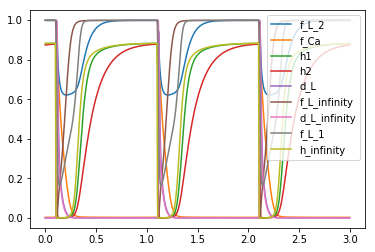

In [14]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [15]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cytosol:d_L:Value
[[0.00000000e+00 1.30050000e-05]
 [3.00000000e-03 1.30014613e-05]
 [6.01000000e-03 1.29984038e-05]
 ...
 [2.99100000e+00 1.30230511e-05]
 [2.99400000e+00 1.30190951e-05]
 [2.99700000e+00 1.30152243e-05]]
Variable:/Cytosol:d_L_infinity:Value
[[0.00000000e+00 1.30015232e-05]
 [3.00000000e-03 1.29988391e-05]
 [6.01000000e-03 1.29958987e-05]
 ...
 [2.99100000e+00 1.30197219e-05]
 [2.99400000e+00 1.30158375e-05]
 [2.99700000e+00 1.30120373e-05]]
Variable:/Cytosol:f_Ca:Value
[[0.00000000e+00 2.89141547e-03]
 [3.00000000e-03 2.89144385e-03]
 [6.01000000e-03 2.89134522e-03]
 ...
 [2.99100000e+00 2.89304594e-03]
 [2.99400000e+00 2.89275277e-03]
 [2.99700000e+00 2.89247219e-03]]
Variable:/Cytosol:f_L_1:Value
[[0.         0.9986    ]
 [0.003      0.99860994]
 [0.00601    0.99861749]
 ...
 [2.991      0.99863722]
 [2.994      0.99863758]
 [2.997      0.99863793]]
Variable:/Cytosol:f_L_2:Value
[[0.         0.9986    ]
 [0.003      0.99860177]
 [0.00601    0.99860348]
 ..

In [16]:
FullPNs_for_plot2 = [ 
    'Variable:/Cytosol:Ca_i:Value',
    'Variable:/Cytosol:K_i:Value',
    'Variable:/Cytosol:Na_i:Value',
    ]

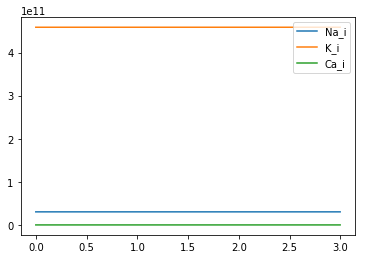

In [17]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot2:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [18]:
for aFullPN in FullPNs_for_plot2:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cytosol:Ca_i:Value
[[0.00000000e+00 2.38437084e+05]
 [3.00000000e-03 2.38511867e+05]
 [6.01000000e-03 2.38477046e+05]
 ...
 [2.99100000e+00 2.38549331e+05]
 [2.99400000e+00 2.38532287e+05]
 [2.99700000e+00 2.38516200e+05]]
Variable:/Cytosol:K_i:Value
[[0.00000000e+00 4.58643245e+11]
 [3.00000000e-03 4.58643420e+11]
 [6.01000000e-03 4.58643597e+11]
 ...
 [2.99100000e+00 4.58642627e+11]
 [2.99400000e+00 4.58642803e+11]
 [2.99700000e+00 4.58642979e+11]]
Variable:/Cytosol:Na_i:Value
[[0.00000000e+00 3.03129399e+10]
 [3.00000000e-03 3.03128868e+10]
 [6.01000000e-03 3.03128329e+10]
 ...
 [2.99100000e+00 3.03130840e+10]
 [2.99400000e+00 3.03130302e+10]
 [2.99700000e+00 3.03129764e+10]]


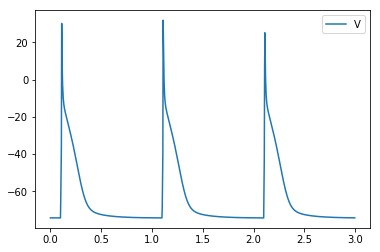

In [19]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN == 'Variable:/Cytosol:V:Value':
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [20]:
print( Data_dict[ 'Variable:/Cytosol:V:Value' ])

[[ 0.00000000e+00 -7.42525000e+01]
 [ 3.00000000e-03 -7.42536975e+01]
 [ 6.01000000e-03 -7.42550097e+01]
 ...
 [ 2.99100000e+00 -7.42443871e+01]
 [ 2.99400000e+00 -7.42461178e+01]
 [ 2.99700000e+00 -7.42478115e+01]]


In [21]:
FullPNs_i = [ 
    'Variable:/Cytosol:i_B_Ca:Value',
    'Variable:/Cytosol:i_B_Na:Value',
    'Variable:/Cytosol:i_CaP:Value',
    'Variable:/Cytosol:i_Ca_L:Value',
    'Variable:/Cytosol:i_K1:Value',
    'Variable:/Cytosol:i_Kr:Value',
    'Variable:/Cytosol:i_Ks:Value',
    'Variable:/Cytosol:i_Na:Value',
    'Variable:/Cytosol:i_NaCa:Value',
    'Variable:/Cytosol:i_NaK:Value',
    'Variable:/Cytosol:i_Stim:Value',
    'Variable:/Cytosol:i_sus:Value',
    'Variable:/Cytosol:i_t:Value',
    ]

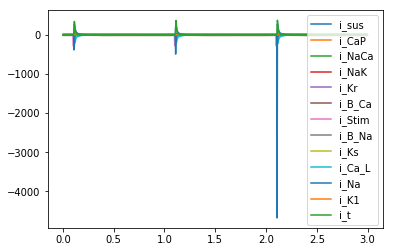

In [22]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_i:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [23]:
for aFullPN in FullPNs_i:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cytosol:i_B_Ca:Value
[[ 0.00000000e+00  0.00000000e+00]
 [ 3.00000000e-03 -1.64301944e+01]
 [ 6.01000000e-03 -1.64305025e+01]
 ...
 [ 2.99100000e+00 -1.64290267e+01]
 [ 2.99400000e+00 -1.64292904e+01]
 [ 2.99700000e+00 -1.64295469e+01]]
Variable:/Cytosol:i_B_Na:Value
[[ 0.00000000e+00  0.00000000e+00]
 [ 3.00000000e-03 -8.84972682e+00]
 [ 6.01000000e-03 -8.84981052e+00]
 ...
 [ 2.99100000e+00 -8.84914606e+00]
 [ 2.99400000e+00 -8.84925512e+00]
 [ 2.99700000e+00 -8.84936194e+00]]
Variable:/Cytosol:i_CaP:Value
[[0.         0.        ]
 [0.003      1.00723245]
 [0.00601    1.00712243]
 ...
 [2.991      1.00735082]
 [2.994      1.00729697]
 [2.997      1.00724614]]
Variable:/Cytosol:i_Ca_L:Value
[[ 0.          0.        ]
 [ 0.003      -0.01176561]
 [ 0.00601    -0.01176298]
 ...
 [ 2.991      -0.0117843 ]
 [ 2.994      -0.01178089]
 [ 2.997      -0.01177756]]
Variable:/Cytosol:i_K1:Value
[[0.00000000e+00 0.00000000e+00]
 [3.00000000e-03 1.97154339e+01]
 [6.01000000e-03 1.9715408

In [24]:
FullPNs_E = [ 
    'Variable:/Cytosol:E_K:Value',
    'Variable:/Cytosol:E_Na:Value',
    'Variable:/Cytosol:E_Ca:Value',
    ]

for aFullPN in FullPNs_E:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cytosol:E_K:Value
[[ 0.00000000e+00 -8.40090738e+01]
 [ 3.00000000e-03 -8.40108103e+01]
 [ 6.01000000e-03 -8.40125641e+01]
 ...
 [ 2.99100000e+00 -8.40029937e+01]
 [ 2.99400000e+00 -8.40047432e+01]
 [ 2.99700000e+00 -8.40064922e+01]]
Variable:/Cytosol:E_Na:Value
[[0.00000000e+00 7.17837403e+01]
 [3.00000000e-03 7.17838083e+01]
 [6.01000000e-03 7.17838774e+01]
 ...
 [2.99100000e+00 7.17835351e+01]
 [2.99400000e+00 7.17836041e+01]
 [2.99700000e+00 7.17836731e+01]]
Variable:/Cytosol:E_Ca:Value
[[0.00000000e+00 1.34570121e+02]
 [3.00000000e-03 1.34566658e+02]
 [6.01000000e-03 1.34569262e+02]
 ...
 [2.99100000e+00 1.34561128e+02]
 [2.99400000e+00 1.34562748e+02]
 [2.99700000e+00 1.34564315e+02]]
